# Data Cleaning

In [1]:
import os
import pandas as pd
import numpy as np

Read data in from csv and create a pandas dataframe

In [2]:
# construct path to Erie Otters dataset
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
path = os.path.abspath(os.path.join(path, 'data/hackathon_scouting.csv'))
print(path)

/Users/williamshaw/Projects/NHL/Big-Data-Cup-2021/data/hackathon_scouting.csv


In [3]:
# create a pandas dataframe from dataset
df = pd.read_csv(path)
df.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2019-09-20,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,0,Sudbury Wolves,...,Faceoff Win,100,43,Forehand,NaN,NaN,NaN,Connor Lockhart,NaN,NaN
1,2019-09-20,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,0,Sudbury Wolves,...,Puck Recovery,67,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-20,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,0,Sudbury Wolves,...,Incomplete Play,45,49,Direct,NaN,NaN,NaN,Blake Murray,74.0,35.0
3,2019-09-20,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,0,Erie Otters,...,Puck Recovery,89,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-20,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,0,Erie Otters,...,Incomplete Play,82,49,Direct,NaN,NaN,NaN,Connor Lockhart,94.0,46.0


In [4]:
# print info of variables
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75873 entries, 0 to 75872
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          75873 non-null  object 
 1   Home Team          75873 non-null  object 
 2   Away Team          75873 non-null  object 
 3   Period             75873 non-null  int64  
 4   Clock              75873 non-null  object 
 5   Home Team Skaters  75873 non-null  int64  
 6   Away Team Skaters  75873 non-null  int64  
 7   Home Team Goals    75873 non-null  int64  
 8   Away Team Goals    75873 non-null  int64  
 9   Team               75873 non-null  object 
 10  Player             75873 non-null  object 
 11  Event              75873 non-null  object 
 12  X Coordinate       75873 non-null  int64  
 13  Y Coordinate       75873 non-null  int64  
 14  Detail 1           51958 non-null  object 
 15  Detail 2           5180 non-null   object 
 16  Detail 3           518

### Convert Variable Names
Instead of using spaces, use underscores

In [5]:
# convert column names
df.columns = ['game_date', 
              'home_team',
              'away_team',
              'period',
              'clock',
              'home_team_skaters',
              'away_team_skaters',
              'home_team_goals',
              'away_team_goals',
              'team',
              'player_1',
              'event',
              'x_coord_1',
              'y_coord_1',
              'detail_1',
              'detail_2',
              'detail_3',
              'detail_4',
              'player_2',
              'x_coord_2',
              'y_coord_2'
             ]

### View counts of each type of event

In [6]:
df['event'].value_counts()

Play               23778
Puck Recovery      20667
Incomplete Play     8890
Zone Entry          6362
Dump In/Out         4888
Shot                4887
Takeaway            3248
Faceoff Win         2441
Penalty Taken        419
Goal                 293
Name: event, dtype: int64

### Create a dataframe containing only shots

In [7]:
df_shots = df[df['event']=='Shot'].copy()
df_shots.head()

,game_date,home_team,away_team,period,clock,home_team_skaters,away_team_skaters,home_team_goals,away_team_goals,team,...,event,x_coord_1,y_coord_1,detail_1,detail_2,detail_3,detail_4,player_2,x_coord_2,y_coord_2
16,2019-09-20,Erie Otters,Sudbury Wolves,1,19:26,5,5,0,0,Sudbury Wolves,...,Shot,177,57,Snapshot,On Net,f,f,NaN,NaN,NaN
19,2019-09-20,Erie Otters,Sudbury Wolves,1,19:21,5,5,0,0,Sudbury Wolves,...,Shot,134,70,Wristshot,Missed,f,f,NaN,NaN,NaN
20,2019-09-20,Erie Otters,Sudbury Wolves,1,19:21,5,5,0,0,Sudbury Wolves,...,Shot,165,56,Deflection,Missed,f,f,NaN,NaN,NaN
34,2019-09-20,Erie Otters,Sudbury Wolves,1,19:01,5,5,0,0,Erie Otters,...,Shot,172,71,Wristshot,On Net,f,f,NaN,NaN,NaN
87,2019-09-20,Erie Otters,Sudbury Wolves,1,17:17,5,5,0,0,Erie Otters,...,Shot,131,6,Snapshot,Missed,t,f,NaN,NaN,NaN


In [8]:
print('Types of shots stored in detail_1:')
print(df_shots['detail_1'].value_counts())

print('\nDelivery of shot stored in detail_2:')
print(df_shots['detail_2'].value_counts())

Types of shots stored in detail_1:
Wristshot      2481
Snapshot       1509
Slapshot        431
Deflection      246
Fan             184
Wrap Around      36
Name: detail_1, dtype: int64

Delivery of shot stored in detail_2:
On Net     2269
Missed     1405
Blocked    1213
Name: detail_2, dtype: int64


<AxesSubplot:xlabel='x_coord_1', ylabel='y_coord_1'>

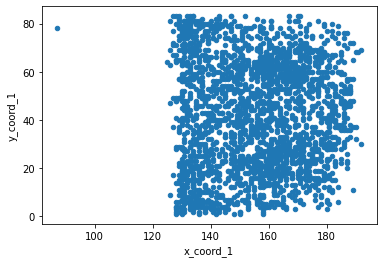

In [9]:
# plot all shots
df_shots[df_shots['detail_1']=='Wristshot'].plot.scatter(x='x_coord_1', y='y_coord_1')

<AxesSubplot:xlabel='x_coord_1', ylabel='y_coord_1'>

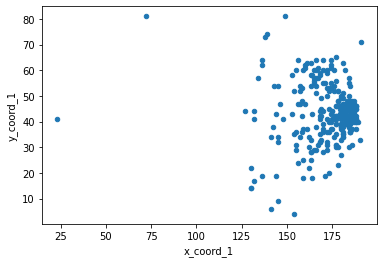

In [10]:
df[df['event']=='Goal'].plot.scatter(x='x_coord_1', y='y_coord_1')

### Save to pickle file

In [16]:
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
path = os.path.abspath(os.path.join(path, 'data/df_all_events.pkl'))
print(path)

df.to_pickle(path)

/Users/williamshaw/Projects/NHL/Big-Data-Cup-2021/data/df_all_events.pkl
